# CME 193 - Lecture 2
This class we will cover
1. Basics of creating classes and objects
2. Basics of NumPy

# Classes (Basic Section Start)

Classes let you abstract away details while programming.

In [1]:
print(2 + 3)
print('2' + '3')

print([1,[2,3]] + [4, 5] ) # a.extend(b)

5
23
[1, [2, 3], 4, 5]


In [2]:
x = []
x.append(2)
x

[2]

In [3]:
type(x)

list

In [5]:
class Animal:
    # constructor __init__
    def fun(x):
      print(x)
    def __init__(self, sound = 'NA'):
        self.sound_attribute = sound
        print(f"An Animal class with sound '{sound}' is created")
    # method
    def make_sound(self):
        print(f"Sound: {self.sound_attribute}")

    def set_sound(self, newsound):
        self.sound_attribute = newsound

In [6]:
cat = Animal(sound = 'Meow')
dog = Animal(sound = 'Bark')

An Animal class with sound 'Meow' is created
An Animal class with sound 'Bark' is created


In [7]:
cat = Animal()

An Animal class with sound 'NA' is created


In [8]:
cat.set_sound('MMMM')

In [9]:
cat.make_sound()

Sound: MMMM


In [10]:
type(cat), type(dog)

(__main__.Animal, __main__.Animal)

In [11]:
cat.make_sound()
dog.make_sound()

Sound: MMMM
Sound: Bark


Python use `self` parameter to refer to instance attributes and methods of the class
- If an instance called its class method, the method will treat the first arguments as the reference to the instance
  - `instance.method(args) = class.method(instance,args)`
- `self` refers to the instance of the class (python norm)



In [ ]:
#instance.method(args) = class.method(instance,args)

In [12]:
print("class.method(instance,args):\n")
Animal.make_sound(cat)
Animal.make_sound(dog)

# instance.method(args) = class.method(instance,args)
print("\n\ninstance.method(args):\n")
cat.make_sound()
dog.make_sound()

class.method(instance,args):

Sound: MMMM
Sound: Bark


instance.method(args):

Sound: MMMM
Sound: Bark


In [14]:
# instance.method(args) = class.method(instance, args)
'''
class list:
  def __init__(self, ...):
      ...
  def append(self, args):
      # append the args to the instance self
'''

x = []
list.append(x, 1) #class.method(instance, args)
x

# self argument equals to x
# self is the thing goes to the front of arguments
# can be replaced with anything, but it’s like a explicit rule in python

[1]

In [13]:
# list class
x = []
print(type(x))
x.append(1) #instance.method(args)
x

<class 'list'>


[1]

## Bank Account example to illustrate Classes and Objects

In [15]:
debits = []
credits = []

In [16]:
def add_to_debits(debits_list, value):
    debits_list.append(value)

In [17]:
def add_to_credits(credits_list, value):
    credits_list.append(value)

In [18]:
add_to_debits(debits,10)
add_to_debits(debits,15)
add_to_debits(debits,100)

add_to_credits(credits, 100)

In [19]:
debits

[10, 15, 100]

In [20]:
credits

[100]

In [21]:
def total_value(debits, credits):
    total =0
    for val in debits:
        total+=val
    for val in credits:
        total-=val
    return total

In [22]:
total_value(debits, credits)

25

Problem -> Not Scale Up Well!  What if we have 100 users? What if each user needs another "saving account"?

## Lets use Classes and Objects

#### 1. Initialize a class

In [23]:
class Account:
    def __init__(self):
      self.debits = []
      self.credits = []

In [24]:
a1 = Account()
print(a1.debits)
print(a1.credits)

[]
[]


In [25]:
a2 = Account()
print(a2.debits)
print(a2.credits)

[]
[]


#### 2. Add methods

In [ ]:
a1= {
    'debits' : [],
    'credits' : []
}

In [27]:
class Account:
    # a class attributes
    accounts = []
    def __init__(self):
      # instance attributes
      self.debits = []
      self.credits = []

      # store all existing user account to a shared class attribute
      Account.accounts += [self]

    def add_to_credits(self, value):
      self.credits.append(value)

    def add_to_debits(self, value):
      self.debits.append(value)

    def total_value(self):
      total = 0
      total += sum(self.debits)
      total -= sum(self.credits)
      return total

In [28]:
a1 = Account()
a2 = Account()

print(f"a1.credits:{a1.credits}")
print(f"a2.credits:{a2.credits}\n")

a1.add_to_credits(10)

print(f"a1.credits:{a1.credits}")
print(f"a2.credits:{a2.credits}")

a1.credits:[]
a2.credits:[]

a1.credits:[10]
a2.credits:[]


In [29]:
a1.add_to_debits(40)
a2.add_to_debits(10)

print(f"a1.debits:{a1.debits}")
print(f"a2.debits:{a2.debits}")

a1.debits:[40]
a2.debits:[10]


In [30]:
print(f"a1 total value:{a1.total_value()}")
print(f"a2 total value:{a2.total_value()}")

a1 total value:30
a2 total value:10


In [31]:
Account.accounts

[<__main__.Account at 0x7d9ead3273d0>, <__main__.Account at 0x7d9ead325390>]

In [32]:
a1.accounts.pop()

In [33]:
a2.accounts

## (Basic Section End)

## Exercise 1 (2 min)

### Add more functionality to the account class

1. Add a check before credits account to ensure funds are available (make sure the total_value is always non-negative). Return True if it is a valid transaction, otherwise return False

2. Add a `transfer` function to your account class, which transfers money form one account to another.It should add to the debits of one account and to the credits of the other.

In [35]:
class Account:
    accounts = []
    def __init__(self):
      self.debits = []
      self.credits = []
      Account.accounts += [self]

    def add_to_credits(self, value):
      # TODO: implement 1.
      if value <= self.total_value():
        self.credits.append(value)
        return True
      else:
        print("Insufficient funds.")
        return False

    def add_to_debits(self, value):
      self.debits.append(value)

    def total_value(self):
      self.guess = 'Take a guess'
      total = 0
      total += sum(self.debits)
      total -= sum(self.credits)
      return total

    def transfer(self, other, value:int):
      # TODO: implement 2.
      if self.add_to_credits(value):
        other.add_to_debits(value)

In [36]:
# Test Code:
a1 = Account()
a2 = Account()
a1.add_to_credits(10)
a1.add_to_debits(40)
a2.add_to_debits(10)

print(f"a1 total value:{a1.total_value()}")
print(f"a2 total value:{a2.total_value()}")

Insufficient funds.
a1 total value:40
a2 total value:10


In [37]:
a1.transfer(a2, 10)

In [38]:
print(f"a1 total value:{a1.total_value()}")
print(f"a2 total value:{a2.total_value()}")

a1 total value:30
a2 total value:20


## Example: Rational Numbers

Here we'l make a class that holds rational numbers (fractions).  That is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers

In [39]:
import math
class Rational:
    def __init__(self, p, q=1):
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g # integer division
        self.q = q // g


    # method to convert rational to string for printing
    def __str__(self):
        return f'{self.p}/{self.q}, I am a rational number :-)'

    def __repr__(self): #printable representation
        return f'Rational({self.p}, {self.q}), :-('

    # method to convert rational to float
    def __float__(self):
        return self.p / self.q


In [40]:
a = Rational(6, 4)
b = Rational(3, 2)

print(type(a))
print(f"a = {a}")
print(f"b = {b}")
print([a,b])
print(f"float(a) = {float(a)}")

<class '__main__.Rational'>
a = 3/2, I am a rational number :-)
b = 3/2, I am a rational number :-)
[Rational(3, 2), :-(, Rational(3, 2), :-(]
float(a) = 1.5


In [41]:
a + b
# We need Magic Method!!

TypeError: unsupported operand type(s) for +: 'Rational' and 'Rational'

## Plus Operation: `__add__`


In [42]:
a = 2
b = 3
print(a + b)
#instance.method(args) = class.method(instance,args)
print(a.__add__(b))
print(int.__add__(a,b))

5
5
5


In [43]:
# For example:
a = [1,2]
b = [3,4]
#a + b
print(a.__add__(b))
print(list.__add__(a,b))

[1, 2, 3, 4]
[1, 2, 3, 4]


## Example: Rational Numbers

Let's continue with our example of rational numbers (fractions), that is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers. Let's make it support addition using the formula:
$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [44]:
import math
from typing import Union
class Rational:
    def __init__(self, p, q=1):

        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g
        self.q = q // g

    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)

    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)

    # method to add two rationals - interprets self + other
    def __add__(self, other: Union[Rational, int, float]):
        #Return whether an object is an instance of a class or of a subclass thereof.
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)

    def __radd__(self, other): # interprets other + self
       return self + other # addition commutes!


In [45]:
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

3 / 4
5 / 2


In [46]:
r3 = r1 + r2
print( type(r3) )
print( r3 )
print( float( r3 ))

<class '__main__.Rational'>
13 / 4
3.25


In [47]:
 #left add
print( r1 + 3 )

#Rational.__add__(self, other)

15 / 4


In [48]:
#right add
print( 3 + r1 )

# (3).__add__(r1) if failed
# r1.__radd__(3)

15 / 4


# Exercise 2 (Post-Lecture)
More about magic method: Magic Method : https://python-course.eu/oop/magic-methods.php
### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.7/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__`
* `/` - use `__truediv__`
* `-` - use `__sub__`

You only need to define these operations between two `Rational` types - use an `if isinstance(other, Rational):` block.

Make a few examples to convince yourself that this works.



In [100]:
# YOUR CODE HERE
# Solution
class Rational:
    def __init__(self, p, q=1):

        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g
        self.q = q // g

    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)

    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)

    def __repr__(self):
        return str(self)

    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)

    def __radd__(self, other): # interprets other + self
        return self + other # addition commutes!

    # subtraction
    def __sub__(self, other):
        if isinstance(other, Rational):
            return self + Rational(-other.p,other.q)
        elif isinstance(other, int):
            return self + (-other)
        # otherwise, assume float
        return float(self) - float(other)


    # multiplication
    def __mul__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p*other.p,self.q*other.q)
        elif isinstance(other, int):
            return Rational(self.p*other,self.q)
        # otherwise, assume float
        return float(self) * float(other)

    # division
    def __truediv__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p*other.q,self.q*other.p)
        elif isinstance(other, int):
            return Rational(self.p,self.q*other)
        return float(self) / float(other)

    def __rmul__(self, other):
        return self*other;

In [101]:
# Write some examples to test your code
r1 = Rational(3,4)
print(r1)
r2 = Rational(5,2)
print(r2)

3 / 4
5 / 2


In [102]:
r1

3 / 4

In [103]:
r1 * r2

15 / 8

In [104]:
r1 - r2

-7 / 4

In [105]:
r1 / r2

3 / 10

# Exercise 3 [Post Lecture]
## Square root of rationals using the Babylonian method

Implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing the square root of a number $S$.

### Algorithm

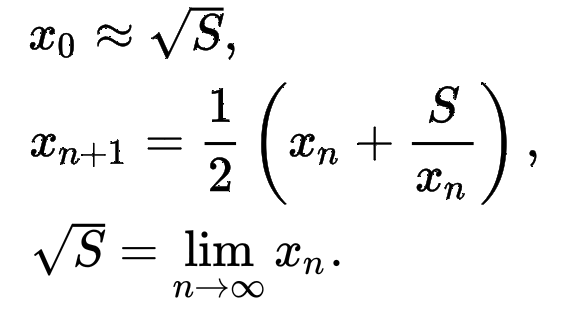

In [113]:
def babylonian(S, num_iters=5):
    x = 1
    for i in range(num_iters):
      x = 0.5*(x + S/x)
    print("error:", abs(math.sqrt(S)-x)/math.sqrt(S))
    return(x)




In [114]:
math.sqrt(24)

4.898979485566356

In [115]:
babylonian(24)

error: 3.520471377712802e-06


4.898996732283415

In [116]:
babylonian(Rational(24))

error: 3.520471377712802e-06


4.898996732283415

# NumPy
This is a good segue into NumPy. Python provides only a handful of numeric types: ints, longs, floats, and complex numbers. We just declared a class that implements rational numbers. NumPy implements one very useful numeric type: multidimensional arrays.

In [49]:
# Quick note on importing
import math
math.sin(5)

-0.9589242746631385

In [50]:
import math as m
m.sin(5)

-0.9589242746631385

In [51]:
import numpy as np

In [ ]:
!pip install numpy

In [52]:
?np.array

In [53]:
print([[0, 2], [1, 5]])

[[0, 2], [1, 5]]


In [54]:
x = np.array([[0, 2], [1, 5]])
print(type(x))
x

<class 'numpy.ndarray'>


array([[0, 2],
       [1, 5]])

In [55]:
y = np.array([[4, 0], [0, 4]])
y

array([[4, 0],
       [0, 4]])

In [56]:
x + y

array([[4, 2],
       [1, 9]])

In [57]:
x ** 2

array([[ 0,  4],
       [ 1, 25]])

In [58]:
x * y  # Elementarywise multiplication

array([[ 0,  0],
       [ 0, 20]])

In [59]:
x

array([[0, 2],
       [1, 5]])

In [60]:
y

array([[4, 0],
       [0, 4]])

In [61]:
x @ y  # Matrix multiplication after Python 3.5, traditional way: np.matmul()

array([[ 0,  8],
       [ 4, 20]])

In [62]:
np.matmul(x,y)

array([[ 0,  8],
       [ 4, 20]])

In [63]:
np.sum(x) # More method in the next lecture

8

### Why NumPy?
1. numpy optimize operation for numeric data
2. processes the tasks parallelly.
3. The NumPy package integrates C, C++ in Python. These programming languages have very little execution time compared to Python.

[Jupyter's magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [64]:
%%timeit
x = list(np.random.rand(10000))
y = list(np.random.rand(10000))
z=0
for i in range(10000):
    z += x[i]*y[i]

3.5 ms ± 953 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = x@y

325 µs ± 8.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## NumPy functions for creating arrays

In [66]:
?np.zeros

In [67]:
X=np.zeros(shape = (5,10))
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [68]:
X[1,2] = 1
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [69]:
X.shape

(5, 10)

In [70]:
Y = np.ones(shape = (5,10))
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [71]:
?np.twos

Object `np.twos` not found.


In [72]:
2*Y + 3

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [73]:
R=np.random.rand(5,5)
R

array([[0.85785928, 0.38938591, 0.64505535, 0.04113482, 0.39495083],
       [0.45915164, 0.2084822 , 0.00635496, 0.74141588, 0.42082382],
       [0.08385216, 0.90833742, 0.47663992, 0.23301681, 0.30647845],
       [0.54325721, 0.47196952, 0.69254243, 0.59373846, 0.77257488],
       [0.42400913, 0.85029952, 0.59971375, 0.54562881, 0.61637809]])

In [74]:
Rn = np.random.randn(5,5) #each number is a standard random normal variable (“standard normal” distribution)
Rn

array([[ 0.56058429,  1.07547218,  1.3757253 ,  2.03277737, -0.27068966],
       [-0.02035509, -0.35030324,  1.4883616 , -0.07448296,  0.64558538],
       [-0.11817655,  1.72052768,  1.42960016,  1.24226527,  1.62253852],
       [-0.33087146, -2.59356761,  1.11950559, -0.78652693,  0.11411538],
       [-0.28737197,  0.5607368 ,  0.39248548,  0.41240909,  0.56126159]])

In [76]:
np.arange(1,100,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [75]:
x = []
for i in range(1,100,2):
  x.append(i)
print(x)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [77]:
np.linspace(1,99,51) #end value is inclusive!

array([ 1.  ,  2.96,  4.92,  6.88,  8.84, 10.8 , 12.76, 14.72, 16.68,
       18.64, 20.6 , 22.56, 24.52, 26.48, 28.44, 30.4 , 32.36, 34.32,
       36.28, 38.24, 40.2 , 42.16, 44.12, 46.08, 48.04, 50.  , 51.96,
       53.92, 55.88, 57.84, 59.8 , 61.76, 63.72, 65.68, 67.64, 69.6 ,
       71.56, 73.52, 75.48, 77.44, 79.4 , 81.36, 83.32, 85.28, 87.24,
       89.2 , 91.16, 93.12, 95.08, 97.04, 99.  ])

In [78]:
np.linspace(0,5,11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [79]:
X = np.arange(48)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [82]:
X.reshape(6,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [83]:
X.reshape(2,3,8)

array([[[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47]]])

# Exercise 4

## Numpy Array construction

1. 5 by 10 array with all elements random between 50 and 100.
2. All numbers between 50 and 51, separated by 0.01

In [85]:
# YOUR CODE HERE
x = np.random.randint(50, 100+1, size=(5, 10))
print(x)
y = np.arange(50, 51+0.01, 0.01)
print(y)

[[75 83 56 75 78 54 89 58 85 59]
 [81 73 53 94 89 80 81 97 75 70]
 [82 91 96 65 96 63 73 66 77 73]
 [50 54 54 84 99 69 72 73 53 94]
 [58 62 54 68 65 92 71 50 76 51]]
[50.   50.01 50.02 50.03 50.04 50.05 50.06 50.07 50.08 50.09 50.1  50.11
 50.12 50.13 50.14 50.15 50.16 50.17 50.18 50.19 50.2  50.21 50.22 50.23
 50.24 50.25 50.26 50.27 50.28 50.29 50.3  50.31 50.32 50.33 50.34 50.35
 50.36 50.37 50.38 50.39 50.4  50.41 50.42 50.43 50.44 50.45 50.46 50.47
 50.48 50.49 50.5  50.51 50.52 50.53 50.54 50.55 50.56 50.57 50.58 50.59
 50.6  50.61 50.62 50.63 50.64 50.65 50.66 50.67 50.68 50.69 50.7  50.71
 50.72 50.73 50.74 50.75 50.76 50.77 50.78 50.79 50.8  50.81 50.82 50.83
 50.84 50.85 50.86 50.87 50.88 50.89 50.9  50.91 50.92 50.93 50.94 50.95
 50.96 50.97 50.98 50.99 51.  ]


# Plotting (Optional)

We will see some functions to do some quick plotting, we will come back to this library later.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB

In [87]:
x = np.linspace(-5,5,100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [88]:
y = x*x
y

array([2.50000000e+01, 2.40001020e+01, 2.30206101e+01, 2.20615243e+01,
       2.11228446e+01, 2.02045710e+01, 1.93067034e+01, 1.84292419e+01,
       1.75721865e+01, 1.67355372e+01, 1.59192939e+01, 1.51234568e+01,
       1.43480257e+01, 1.35930007e+01, 1.28583818e+01, 1.21441690e+01,
       1.14503622e+01, 1.07769615e+01, 1.01239669e+01, 9.49137843e+00,
       8.87919600e+00, 8.28741965e+00, 7.71604938e+00, 7.16508520e+00,
       6.63452709e+00, 6.12437506e+00, 5.63462912e+00, 5.16528926e+00,
       4.71635547e+00, 4.28782777e+00, 3.87970615e+00, 3.49199061e+00,
       3.12468115e+00, 2.77777778e+00, 2.45128048e+00, 2.14518927e+00,
       1.85950413e+00, 1.59422508e+00, 1.34935211e+00, 1.12488522e+00,
       9.20824406e-01, 7.37169677e-01, 5.73921028e-01, 4.31078461e-01,
       3.08641975e-01, 2.06611570e-01, 1.24987246e-01, 6.37690032e-02,
       2.29568411e-02, 2.55076013e-03, 2.55076013e-03, 2.29568411e-02,
       6.37690032e-02, 1.24987246e-01, 2.06611570e-01, 3.08641975e-01,
      

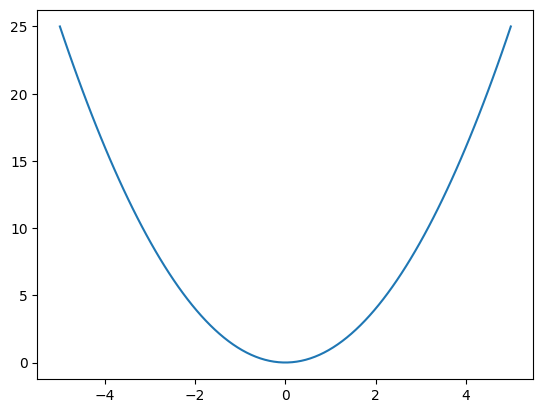

In [89]:
plt.plot(x,y)

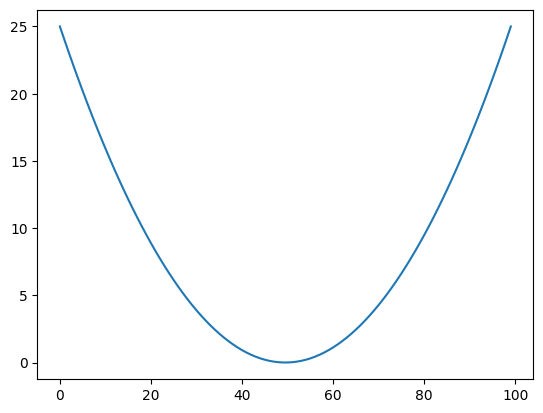

In [90]:
plt.plot(y)

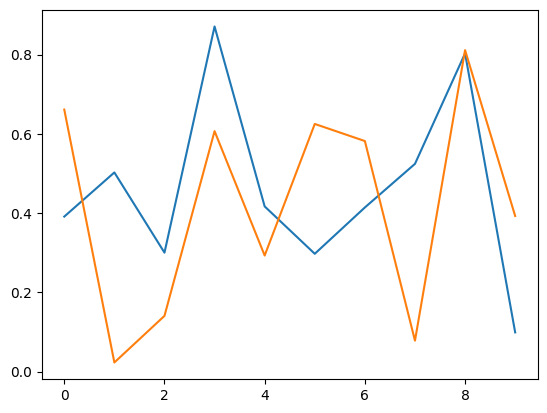

In [91]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

Text(0.5, 1.0, 'Title')

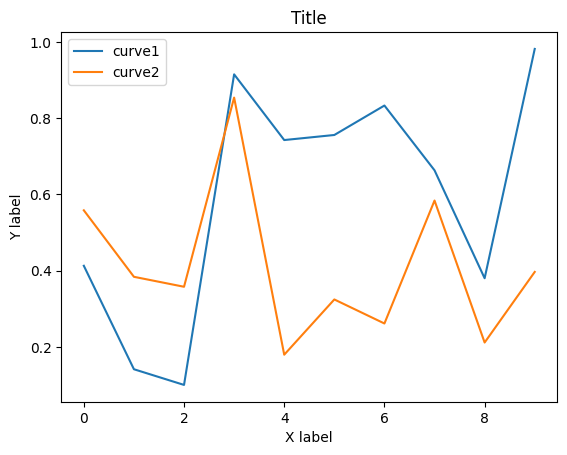

In [92]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1","curve2"]) #add legend label
plt.xlabel("X label") #add x label
plt.ylabel("Y label") #add y label
plt.title("Title") #add title

Matplotlib Gallery: https://matplotlib.org/stable/plot_types/index  

Other plots template:
[seaborn](https://seaborn.pydata.org/examples/index.html)  

Interactive Plot:
[plotly](https://plotly.com/python/)

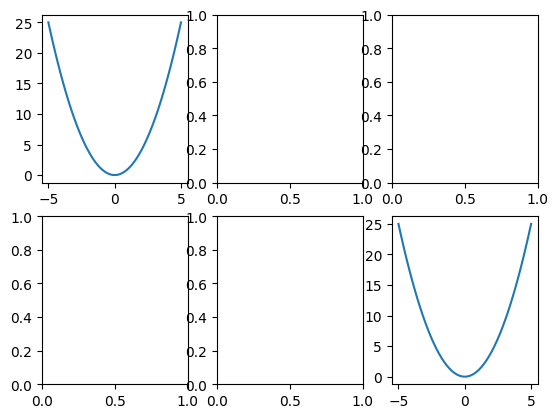

In [93]:
# Multiple Subplots
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].plot(x,y)
ax[1,2].plot(x,y)